In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 


stocks = ("SPY", "MSFT","AAPL","T","DDD","JNJ","KO","Pep","MCD", "AA", "XOM", "GOOG", "AMZN")
stocks = sorted(stocks)
ST = ' '.join(stocks)

data = yf.download(ST, start="2000-01-01", end="2017-04-30", index = stocks)
data1 = data['Close']
print(data1.head())

[*********************100%***********************]  13 of 13 completed
                    AA      AAPL     AMZN       DDD  GOOG       JNJ        KO  \
Date                                                                            
2000-01-03   96.840897  0.999442  89.3750  2.750000   NaN  46.09375  28.18750   
2000-01-04   97.561798  0.915179  81.9375  2.625000   NaN  44.40625  28.21875   
2000-01-05  103.329002  0.928571  69.7500  2.770833   NaN  44.87500  28.46875   
2000-01-06  101.598839  0.848214  65.5625  2.750000   NaN  46.28125  28.50000   
2000-01-07  101.406601  0.888393  69.5625  2.916667   NaN  48.25000  30.37500   

                MCD      MSFT      PEP       SPY        T       XOM  
Date                                                                 
2000-01-03  39.6250  58.28125  36.8750  145.4375  47.0000  39.15625  
2000-01-04  38.8125  56.31250  35.9375  139.7500  44.2500  38.40625  
2000-01-05  39.4375  56.90625  35.0625  140.0000  44.9375  40.50000  
2000-01-06 

In [4]:
#We may want to see if there is a relationship between RSI and a windowed Hurst Exponent
def RSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]

    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

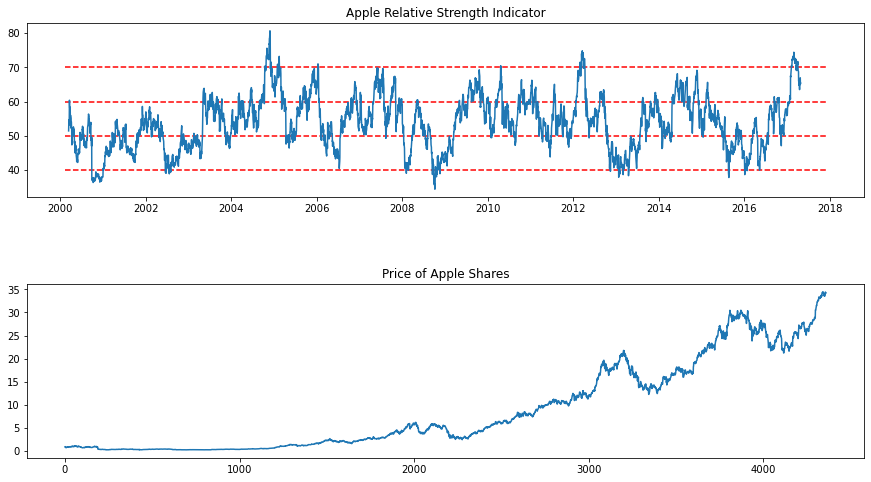

In [5]:
AA = data.iloc[:,1]
AAA = RSI(AA,50)
fig = plt.figure(figsize = (15,8))
plt.subplots_adjust(hspace=0.5)
plt.subplot(211)
plt.plot(AAA)
for i in 10*np.arange(4,8):
    plt.hlines(y=i, xmin =11000, xmax=17500, colors='r', linestyles = '--')
plt.title('Apple Relative Strength Indicator');
plt.subplot(212)
plt.plot(AA.to_numpy())
plt.title('Price of Apple Shares');

In [ ]:
def windowed_hurst_exponent(data, window,minimumtimespan, maximum_time_span, cumulative):
    columns = data.shape[0]
    windowed_data = np.zeros((columns-window + 1,window))
    for jj in range(columns-window):
        windowed_data[jj,:] = data[jj:window+jj]
        
    hurst_exponents = np.zeros((columns-window + 1,1))
    
    #each row gives data pertaining to a particular window
    # we now want to run the hurst calculator on each row 
    for i in np.arange(windowed_data.shape[0]):
        hurst_exponents.T[:,i] = hurstEstimator(data,minimumtimespan, maximum_time_span, cumulative, graph=False)
            
    return hurst_exponents